# Generative Adversarial Networks - introduction

Po raz pierwszy zaprezentowane w pracy "Generative Adversarial Nets" przez m.in Iana Goodfellowa (jednego z autorów książki "Deep learning" opisującej podsumowanie tego co się dzieje w deep learningu, w miarę aktualne). 

## O co chodzi?

Naszym celem jest **znalezienie funkcji generującej próbki z zadanego rozkładu**. Problem ten, pozornie dość niewinnie i nudnie sformułowany jest skomplikowany - dużo ludzi zajmuje się naukowo tym zagadnieniem, ponadto istnieją ciekawe zastosowania. Przykładowo traktując obrazy jako wektory możemy generować próbki z rozkładu zdjęć ludzi i otrzymywać realistycznie wygenerowane twarze.

## Możliwe rozwiązania

Pierwszym pomysłem, najbardziej naturalnym dla statystyka byłoby założenie że dane pochodzą z rozkładu normalnego i wyestymowanie jego parametrów. Idąc dalej w tę stronę można by też było estymować dane mieszanką rozkładów normalnych. Kolejnym pomysłem byłoby nieparametryczne estymowanie gęstości przez funkcje jądrowe.

* estymacja gęstości rozkładu normalnego
* mieszanka rozkładów normalnych
* metody jądrowe

### Mieszanka rozkładów normalnych
$P(X_i=x)=∑_{k=1}^Kπ_k P(X_i=x|Z_i=k)$

### Metody jądrowe
<img src="img/univariate_kernel_density_estimation.png">

## Zbiór danych: twarze

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from sklearn.mixture import GaussianMixture

In [2]:
faces = fetch_olivetti_faces()
faces["images"].shape

(400, 64, 64)

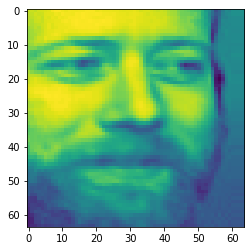

In [3]:
img = random.choice(faces["images"])
plt.imshow(img)

In [4]:
def vec_to_image(vec: np.array) -> np.array:
    return vec.reshape([64, 64])

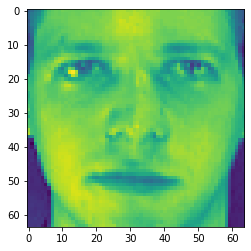

In [5]:
plt.imshow(vec_to_image(faces["data"][0]))

### Estymacja gęstości rozkładu normalnego

In [6]:
mean = np.mean(faces["data"], axis=0)
cov = np.cov(faces["data"].transpose())

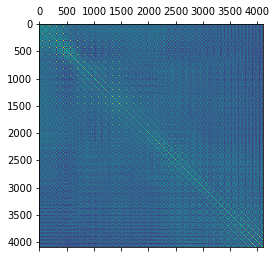

In [7]:
plt.matshow(cov)

In [8]:
mean.shape, cov.shape

((4096,), (4096, 4096))

#### Jak wygląda średni człowiek?

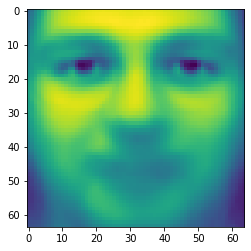

In [9]:
plt.imshow(vec_to_image(mean))

In [10]:
random_person = np.random.multivariate_normal(mean, cov)

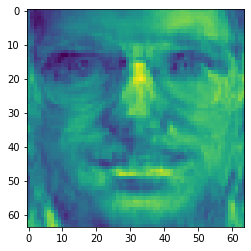

In [11]:
plt.imshow(vec_to_image(random_person))

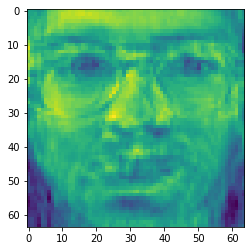

In [12]:
for _ in tqdm(range(5)):
    rand_person = np.random.multivariate_normal(mean, cov)
    plt.imshow(vec_to_image(rand_person))

In [14]:
plt.imsave("img/random_person2.png", vec_to_image(rand_person))

In [15]:
plt.imsave("img/random_person3.png", vec_to_image(random_person))

### Mieszanka rozkładów normalnych
Poprzednio założylismy sobie, że istnieje jeden średni człowiek i wszyscy ludzie to pewne odchylenia od tego "ideału". Być może jest tak w rzeczywistości, ale nie wydaje się to prawdopodobne - zwłaszcza że ten średni człowiek trochę mniej przypomina człowieka niż losowe próbki z tego rozkładu. Może jest tak, że tak naprawdę twarze ludzi mają kilka natualnych skupień, które generują ludzi z osobnych grup. Spróbujmy więc dopasować model mieszanki rozkładów normlanych (gaussian mixture model).

In [17]:
gmm = GaussianMixture(n_components=5, covariance_type="full")
gmm.fit(faces["data"])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [20]:
gmm.means_

array([[0.41743483, 0.45478386, 0.4876033 , ..., 0.37881437, 0.35497457,
        0.34265734],
       [0.32398928, 0.33526915, 0.35978334, ..., 0.3933996 , 0.40663391,
        0.39898369],
       [0.29923795, 0.31136632, 0.33696469, ..., 0.39245465, 0.38306322,
        0.37753569],
       [0.39738292, 0.44230181, 0.48347107, ..., 0.36440159, 0.3214723 ,
        0.31963575],
       [0.48861469, 0.54109114, 0.60475062, ..., 0.20880772, 0.21016587,
        0.21334451]])

In [22]:
gmm.covariances_.shape

(5, 4096, 4096)

In [23]:
k = 0  # 0,.. 4
mean = gmm.means_[k]
cov = gmm.covariances_[k]
random_person = np.random.multivariate_normal(mean, cov)

  0%|          | 0/5 [00:00<?, ?it/s]

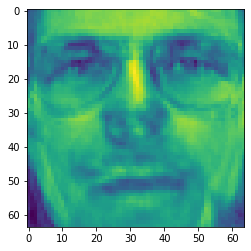

 20%|██        | 1/5 [00:36<02:25, 36.43s/it]

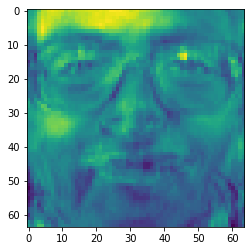

 40%|████      | 2/5 [01:13<01:49, 36.48s/it]

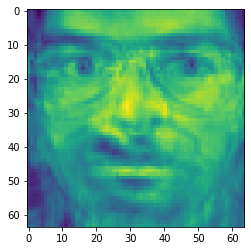

 60%|██████    | 3/5 [01:53<01:15, 37.70s/it]

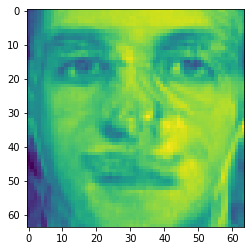

 80%|████████  | 4/5 [02:37<00:39, 39.60s/it]

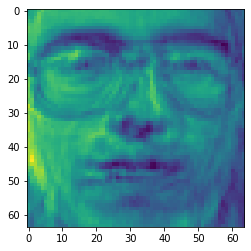

100%|██████████| 5/5 [03:23<00:00, 40.65s/it]


In [30]:
for k in tqdm(range(5)):
    mean = gmm.means_[k]
    cov = gmm.covariances_[k]
    random_person = np.random.multivariate_normal(mean, cov)
    plt.imshow(vec_to_image(random_person))
    plt.show()

### Nieparametryczna estymacja gęstości
* PCA do zmniejszenia wymiarowości danych
* kernel density estimation

#### Przykład dla zbioru cyferek 

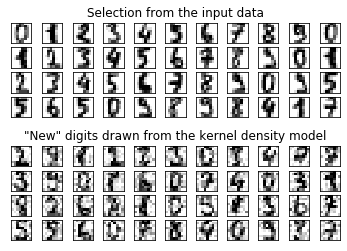

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# load the data
digits = load_digits()

data = digits.data

kde = KernelDensity(bandwidth=3.79269019073225)
kde.fit(data)

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

best bandwidth: 3.79269019073225


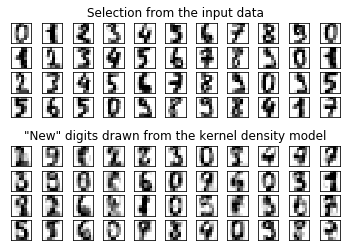

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# load the data
digits = load_digits()

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

#### Przykład dla zbioru twarzy

In [15]:
faces["data"].shape

(400, 4096)

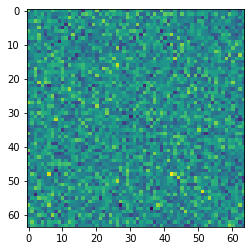

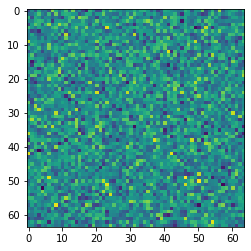

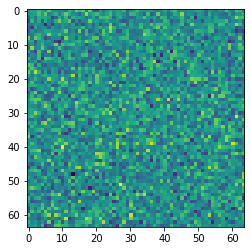

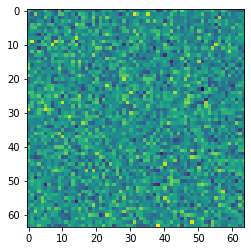

In [28]:
data = faces["data"]

kde = KernelDensity(bandwidth=4)
kde.fit(data)

new_data = kde.sample(4, random_state=0)

for face in new_data:
    plt.imshow(vec_to_image(face))
    plt.show()

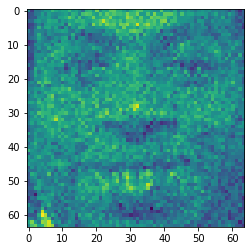

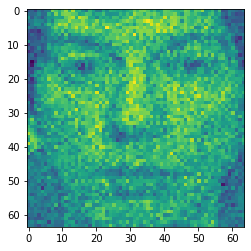

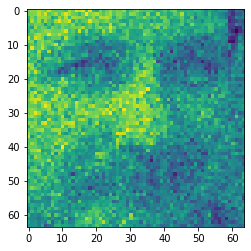

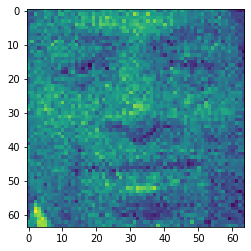

In [30]:
data = faces["data"]

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

kde = grid.best_estimator_

new_data = kde.sample(4, random_state=0)

for face in new_data:
    plt.imshow(vec_to_image(face))
    plt.show()

Widzimy wyraźnie, że ta metoda coś potrafi, ale jest to wyraźny przykład przeuczenia się. Przeglądając pobieżnie zbiór danych widzimy identyczne twarze.  Przykładowo gościu poniżej jest dwukrotnie wygenerowany przez naszą gęstość (swoją drogą każda osoba występuje w zbiorze 10 razy w różnych pozycjach). Oznacza to, że tak naprawdę metoda nie nauczyła się odtwarzać nowych twarzy (tak jak na przykład na https://www.thispersondoesnotexist.com/). Oczywiście trudno oczekiwać że na takim zbiorze nauczymy się czegokolowiek, dlatego nie wyciągam jeszcze żadnych wniosków na temat jakości tych algorytmów. Warto będzie jescze przetestować GANy i nauczyć powyższe metody na większym zbiorze danych (na takich na których uczyły sie dobre GANy, ze zdjęciami lepszej jakości).

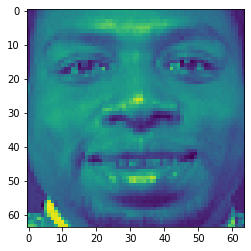

In [50]:
plt.imshow(faces["images"][210])
plt.show()